# Import libraries


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Load the dataset

In [12]:
df=pd.read_csv("Iris.csv")

# analyzing the data

In [13]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.drop(columns=['Id'],inplace=True)
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
df.isnull().sum()
#data is clear


SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Exploratory data analysis

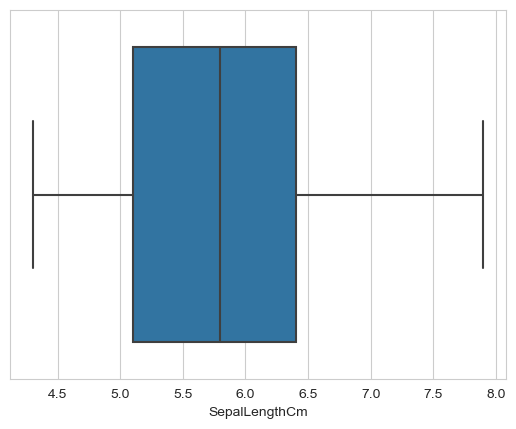

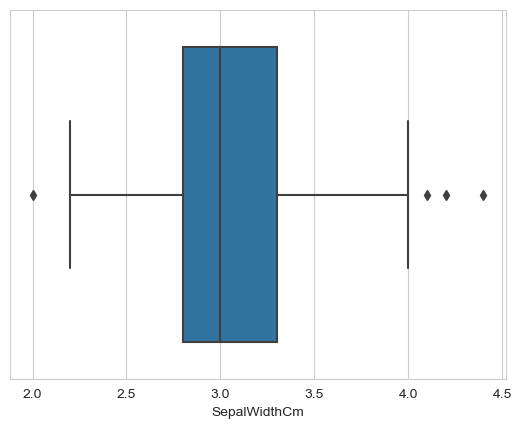

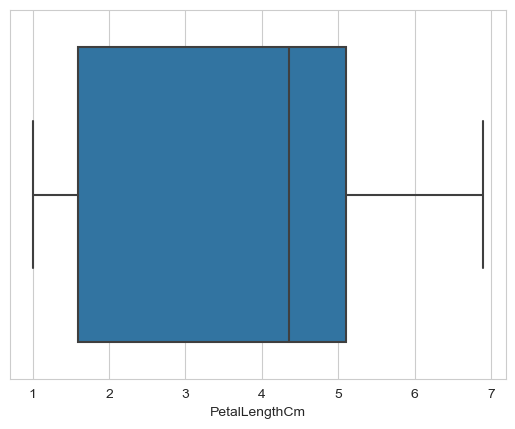

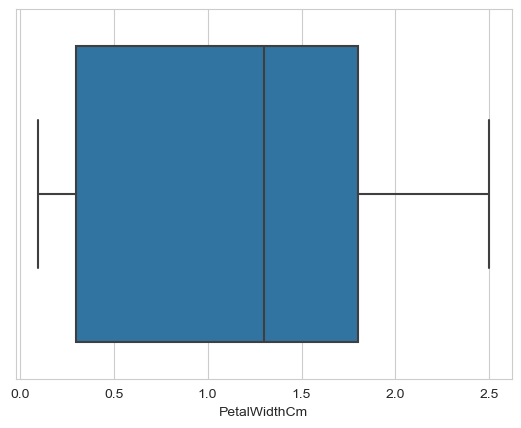

TypeError: Horizontal orientation requires numeric `x` variable.

In [18]:
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

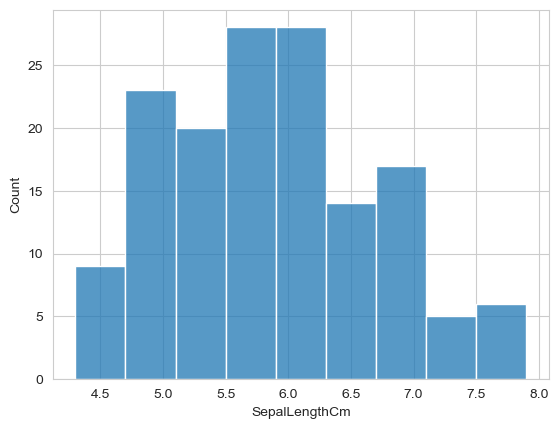

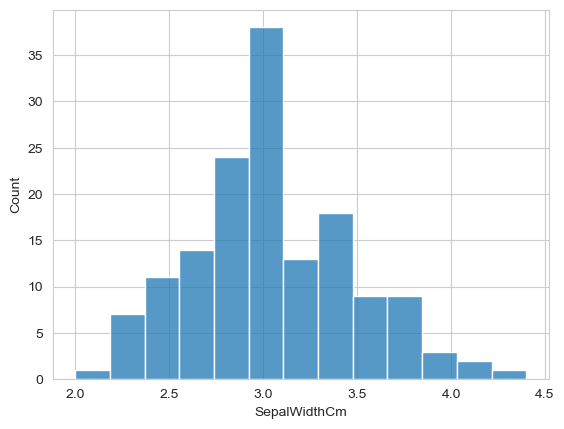

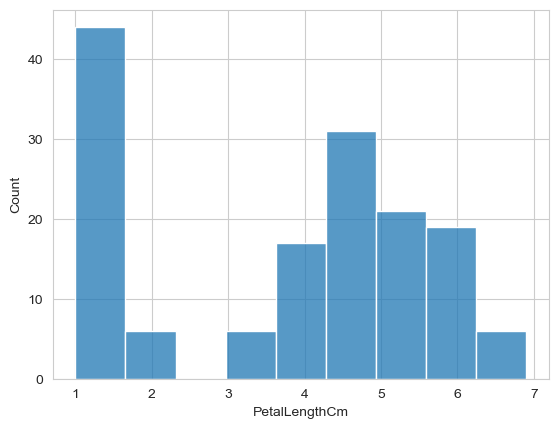

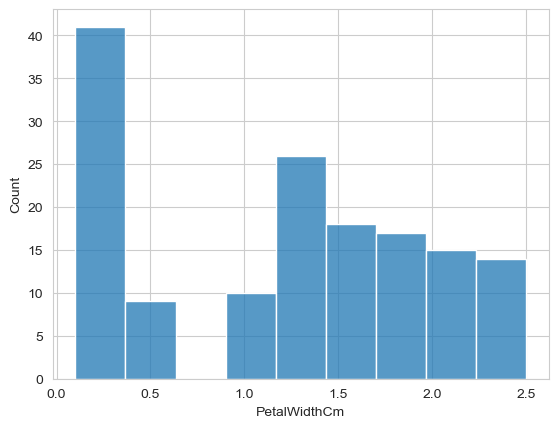

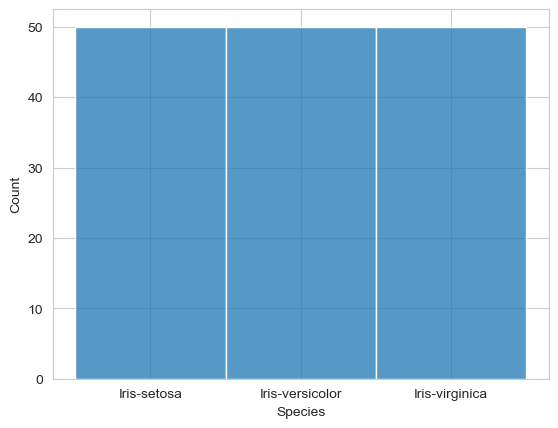

In [19]:
for i in df.columns:
    sns.histplot(data=df,x=i,)
    plt.show()

# Label Encoder


In [20]:
df.loc[df["Species"]=="Iris-setosa","Species"]=0 
df.loc[df["Species"]=="Iris-virginica","Species"]=1
df.loc[df["Species"]=="Iris-versicolor","Species"]=2
    

In [21]:
df["Species"]=df["Species"].astype("int")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [23]:
df["Species"].value_counts()

Species
0    50
2    50
1    50
Name: count, dtype: int64

In [24]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.460039
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.612165
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.649101
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.580749
Species,0.460039,-0.612165,0.649101,0.580749,1.000000


<Axes: >

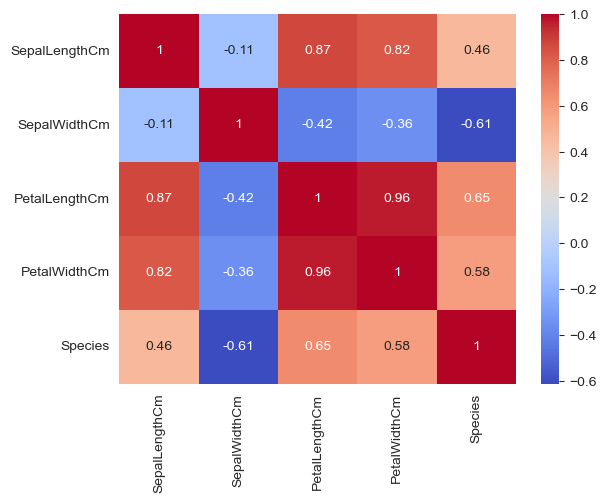

In [25]:
corr=df.corr()
sns.heatmap(corr, annot=True,cmap="coolwarm")

# Training Model

In [26]:
X=df.drop("Species",axis=1)
Y=df["Species"]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)



In [27]:
R=LogisticRegression()
R.fit(x_train,y_train)

LogisticRegression()

In [28]:
print("Accurcy : ",R.score(x_test,y_test)*100)

Accurcy :  95.55555555555556


In [29]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print("Accurcy : ",knn.score(x_test,y_test)*100)

Accurcy :  95.55555555555556


In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
print("Accurcy : ",dt.score(x_test,y_test)*100)

Accurcy :  93.33333333333333
